<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor) + [solution](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor-solution).**

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [19]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

#Comment: I had to peek in the solution for this one. I was frustrated. They want to implement not SGD but GD. The difference is 
# SGD takes a random subsample of a dataset and learn on it through several epochs. What THEY do is implement a classical GD
# which walk through the whole dataset.

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [2]:
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self,eta=10**-3,n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        self.sample_size = 128
        
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]  
                w = new_w.copy()
                
                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X.dot(w)))
                
        self.w_ = self.weights_[np.argmin(self.mse_)]
                
        return self
        
                  
    def predict(self, X):
        X_new = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
        
        return X_new.dot(self.w_)                           

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [3]:
data_demo = pd.read_csv('../../data/weights_heights.csv')

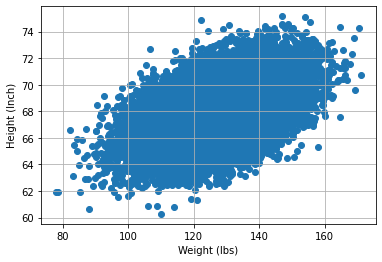

In [4]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [5]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [8]:
# you code here
my_reg = SGDRegressor()
my_reg.fit(X_train_scaled, y_train)
proper_reg = ProperSGDRegressor()
proper_reg.fit(X_train_scaled,y_train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.17s/it]


SGDRegressor()

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

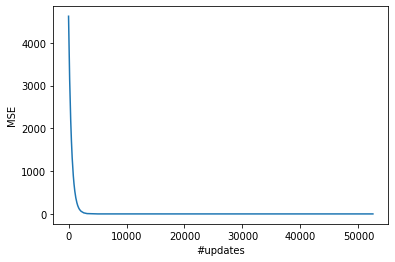

In [9]:
# you code here
plt.plot(range(len(my_reg.mse_)), my_reg.mse_)
plt.xlabel('#updates')
plt.ylabel('MSE');

Print the minimal value of mean squared error and the best weights vector.

In [10]:
# you code here
np.min(my_reg.mse_), my_reg.w_

(2.7151352406643623, array([67.9898497 ,  0.94447605]))

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

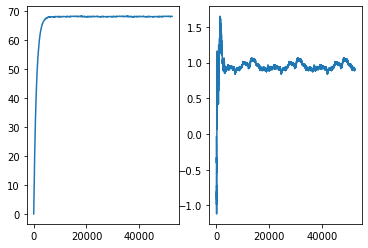

In [11]:
# you code here
plt.subplot(121)
plt.plot(range(len(my_reg.weights_)), 
         [w[0] for w in my_reg.weights_]);
plt.subplot(122)
plt.plot(range(len(my_reg.weights_)), 
         [w[1] for w in my_reg.weights_]);

In [12]:
my_reg.weights_

[array([ 0.06903432, -0.04162395]),
 array([ 0.13309347, -0.13004404]),
 array([ 0.20322099, -0.10351219]),
 array([ 0.27158748, -0.15870566]),
 array([ 0.33971318, -0.11215659]),
 array([ 0.40584437, -0.23798814]),
 array([ 0.47741268, -0.16367273]),
 array([ 0.54658743, -0.1446792 ]),
 array([ 0.61384145, -0.11417402]),
 array([ 0.68280208, -0.2235846 ]),
 array([ 0.74987175, -0.20467858]),
 array([ 0.8206928 , -0.16861421]),
 array([ 0.8854678 , -0.24606622]),
 array([ 0.95455256, -0.19069478]),
 array([ 1.02314499, -0.136917  ]),
 array([ 1.09046692, -0.20285333]),
 array([ 1.15760855, -0.20902162]),
 array([ 1.2231418, -0.2812336]),
 array([ 1.28887945, -0.28029239]),
 array([ 1.35564652, -0.2546329 ]),
 array([ 1.42389976, -0.30944298]),
 array([ 1.49274359, -0.23078282]),
 array([ 1.55627338, -0.29063492]),
 array([ 1.62177115, -0.25246371]),
 array([ 1.68476735, -0.26336178]),
 array([ 1.75150654, -0.36133971]),
 array([ 1.8176268 , -0.36017406]),
 array([ 1.886787  , -0.311407

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [17]:
# you code here
#my_reg.predict(X_valid_scaled)
sgd_holdout_mse =  mean_squared_error(y_valid,my_reg.predict(X_valid_scaled))
sgd_holdout_mse

2.6708681207033784

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [23]:
# you code here
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg_holdout_mse = mean_squared_error(y_valid,linreg.predict(X_valid_scaled))
linreg_holdout_mse

2.670830767667635

In [24]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
